In [ ]:
!pip install transformers

In [ ]:
! pip install datasets

In [ ]:
import datasets
import typing as tp

In [ ]:
conll = datasets.load_dataset("conll2003")
wnut = datasets.load_dataset("wnut_17")

In [ ]:
import inspect
inspect.getmro(type(conll))

(datasets.dataset_dict.DatasetDict, dict, object)

In [ ]:
print(conll.keys(), wnut.keys())

dict_keys(['train', 'validation', 'test']) dict_keys(['train', 'validation', 'test'])


In [ ]:
conll["test"].features

{'chunk_tags': Sequence(feature=ClassLabel(num_classes=23, names=['O', 'B-ADJP', 'I-ADJP', 'B-ADVP', 'I-ADVP', 'B-CONJP', 'I-CONJP', 'B-INTJ', 'I-INTJ', 'B-LST', 'I-LST', 'B-NP', 'I-NP', 'B-PP', 'I-PP', 'B-PRT', 'I-PRT', 'B-SBAR', 'I-SBAR', 'B-UCP', 'I-UCP', 'B-VP', 'I-VP'], names_file=None, id=None), length=-1, id=None),
 'id': Value(dtype='string', id=None),
 'ner_tags': Sequence(feature=ClassLabel(num_classes=9, names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC'], names_file=None, id=None), length=-1, id=None),
 'pos_tags': Sequence(feature=ClassLabel(num_classes=47, names=['"', "''", '#', '$', '(', ')', ',', '.', ':', '``', 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'NN|SYM', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB'], names_file=None, id=None), length=-1, id=None),
 'tokens': Sequence(feature=Value

In [ ]:
wnut["test"].features

{'id': Value(dtype='string', id=None),
 'ner_tags': Sequence(feature=ClassLabel(num_classes=13, names=['O', 'B-corporation', 'I-corporation', 'B-creative-work', 'I-creative-work', 'B-group', 'I-group', 'B-location', 'I-location', 'B-person', 'I-person', 'B-product', 'I-product'], names_file=None, id=None), length=-1, id=None),
 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}

In [ ]:
conll["test"].dataset_size, len(conll["test"])

(10252718, 3453)

In [ ]:
ner_dict = {i:names for (i, names) in enumerate(['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC'])}

In [ ]:
chunks_dict = {i:names for (i, names) in enumerate(['O', 'B-ADJP', 'I-ADJP', 'B-ADVP', 'I-ADVP', 'B-CONJP', 'I-CONJP', 'B-INTJ', 'I-INTJ', 'B-LST', 'I-LST', 'B-NP', 'I-NP', 'B-PP', 'I-PP', 'B-PRT', 'I-PRT', 'B-SBAR', 'I-SBAR', 'B-UCP', 'I-UCP', 'B-VP', 'I-VP'])}

In [ ]:
post_dict = {i:names for (i, names) in enumerate(['"', "''", '#', '$', '(', ')', ',', '.', ':', '``', 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'NN|SYM', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB'])}

In [ ]:
def convert_label_sequence_c(example: tp.Dict[str, tp.Any]) -> tp.Dict[str, tp.Any]:
    converted_example = dict(**example)
    converted_example["ner_tags"] = [ner_dict[i] for i in example["ner_tags"]]
    return converted_example

In [ ]:
converted_conll = conll.map(lambda x: convert_label_sequence_c(x))

In [ ]:
from spacy import displacy

In [ ]:
def ner_render(tokens: tp.Sequence[str], ner_tags: tp.Sequence[str], title: tp.Optional[str] = None, **kwargs):
    pos = 0
    ents = []
    words = tokens
    ner = ner_tags
    for word, tag in zip(words, ner):
        if tag.startswith('B'):
            ents.append({
                "start": pos,
                "end": pos + len(word),
                "label": tag.split("-")[1]
            })
        elif tag.startswith('I'):
            ents[-1]["end"] = pos + len(word)
        pos += (len(word) + 1)
    displacy.render({
        "text": " ".join(words),
        "ents": ents,
        "title": title
    }, style="ent", manual=True, jupyter = True)

In [ ]:
conll["test"][50]

{'chunk_tags': [11, 13, 11, 12, 12],
 'id': '50',
 'ner_tags': [0, 0, 0, 7, 8],
 'pos_tags': [24, 15, 12, 22, 22],
 'tokens': ['Results', 'of', 'the', 'World', 'Cup']}

In [ ]:
ner_render(**converted_conll["test"][50])
ner_render(**converted_conll["test"][200])

In [ ]:
from itertools import chain
from collections import Counter

# Count every type of tag in CONLL and WNUT datasets:

conll_tag_counts = Counter()
wnut_tag_counts = Counter()

In [ ]:
label_mapping = {
    'O': 'O',
    'B-location': 'B-LOC',
    'I-location': 'I-LOC',
    'B-group': 'B-ORG',
    'B-corporation': 'B-ORG',
    'B-person': 'B-PER',
    'B-creative-work': 'B-MISC',
    'B-product': 'B-MISC',
    'I-person': 'I-PER',
    'I-creative-work': 'I-MISC',
    'I-corporation': 'I-ORG',
    'I-group': 'I-ORG',
    'I-product': 'I-MISC'
}

In [ ]:
ner_dict2 = {i:names for (i, names) in enumerate(['O', 'B-corporation', 'I-corporation', 'B-creative-work', 'I-creative-work', 'B-group', 'I-group', 'B-location', 'I-location', 'B-person', 'I-person', 'B-product', 'I-product'])}

In [ ]:
def convert_label_sequence(example: tp.Dict[str, tp.Any], label_mapping: tp.Dict[str, str]) -> tp.Dict[str, tp.Any]:
    converted_example = dict(**example)
    converted_example["ner_tags"] = [ner_dict2[i] for i in example["ner_tags"]]
    converted_example["ner_tags"] = [label_mapping[label] for label in converted_example["ner_tags"]]
    return converted_example

In [ ]:
converted_wnut = wnut.map(lambda x: convert_label_sequence(x, label_mapping))

In [ ]:
ner_render(**converted_wnut["train"][0])
ner_render(**converted_wnut["train"][1])
ner_render(**converted_wnut["train"][2])

In [ ]:
from IPython.display import IFrame
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
import matplotlib.pyplot as plt
from IPython.display import IFrame
%matplotlib inline

In [ ]:
!pip3 install scattertext

In [ ]:
import scattertext as st
import pandas as pd

In [ ]:
conll_df = pd.DataFrame([{"text": " ".join(example["tokens"]), "ner": example["ner_tags"], "dataset": "conll"} for example in converted_conll["train"]])
wnut_df = pd.DataFrame([{"text": " ".join(example["tokens"]), "ner": example["ner_tags"], "dataset": "wnut"} for example in converted_wnut["train"]])

In [ ]:
df = pd.concat([conll_df, wnut_df]).assign(
    parse=lambda df: df.text.apply(st.whitespace_nlp_with_sentences)
)

corpus = st.CorpusFromParsedDocuments(
    df, category_col='dataset', parsed_col='parse'
).build().get_unigram_corpus().compact(st.AssociationCompactor(2000))

In [ ]:
html = st.produce_scattertext_explorer(
    corpus,
    category='conll', category_name='CONLL', not_category_name='WNUT',
    minimum_term_frequency=0, pmi_threshold_coefficient=0,
    width_in_pixels=1000,
    transform=st.Scalers.dense_rank
)

with open("difference.html", "w") as outf:
    print(html, file=outf)

In [ ]:
IFrame("difference.html", width=1200, height=1000)

In [ ]:
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer

In [ ]:
import torch

In [ ]:
nlp = pipeline("ner")
model = AutoModelForTokenClassification.from_pretrained("dbmdz/bert-large-cased-finetuned-conll03-english")
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [ ]:
inspect.getmro(type(model))

(transformers.models.bert.modeling_bert.BertForTokenClassification,
 transformers.models.bert.modeling_bert.BertPreTrainedModel,
 transformers.modeling_utils.PreTrainedModel,
 torch.nn.modules.module.Module,
 transformers.modeling_utils.ModuleUtilsMixin,
 transformers.generation_utils.GenerationMixin,
 object)

In [ ]:
inspect.getmro(type(tokenizer))

(transformers.models.bert.tokenization_bert_fast.BertTokenizerFast,
 transformers.tokenization_utils_fast.PreTrainedTokenizerFast,
 transformers.tokenization_utils_base.PreTrainedTokenizerBase,
 transformers.tokenization_utils_base.SpecialTokensMixin,
 object)

In [ ]:
model.config

BertConfig {
  "_name_or_path": "dbmdz/bert-large-cased-finetuned-conll03-english",
  "_num_labels": 9,
  "architectures": [
    "BertForTokenClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "directionality": "bidi",
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "id2label": {
    "0": "O",
    "1": "B-MISC",
    "2": "I-MISC",
    "3": "B-PER",
    "4": "I-PER",
    "5": "B-ORG",
    "6": "I-ORG",
    "7": "B-LOC",
    "8": "I-LOC"
  },
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "label2id": {
    "B-LOC": 7,
    "B-MISC": 1,
    "B-ORG": 5,
    "B-PER": 3,
    "I-LOC": 8,
    "I-MISC": 2,
    "I-ORG": 6,
    "I-PER": 4,
    "O": 0
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 16,
  "num_hidden_layers": 24,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "poo

In [ ]:
model.classifier

Linear(in_features=1024, out_features=9, bias=True)

In [ ]:
model.bert

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(28996, 1024, padding_idx=0)
    (position_embeddings): Embedding(512, 1024)
    (token_type_embeddings): Embedding(2, 1024)
    (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=1024, out_features=1024, bias=True)
            (key): Linear(in_features=1024, out_features=1024, bias=True)
            (value): Linear(in_features=1024, out_features=1024, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=1024, out_features=1024, bias=True)
            (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=Fals

In [ ]:
ner_render(**converted_conll["test"][10])

In [ ]:
def tokenize_and_preserve_tags(example: tp.Dict[str, tp.Any],
                               tokenizer,
                               label2id: tp.Dict[str, int],
                               tokenizer_params={}) -> tp.Dict[str, tp.Any]:
    # write your own function to split each pair of word-token to same number of pieces.
    encoded = tokenizer(example["tokens"], is_split_into_words=True, **tokenizer_params)
    encoded.update(example)
    tokenised = tokenizer.convert_ids_to_tokens(encoded["input_ids"])
    tokenised = tokenised[1:-1]
    encoded['labels'] = []
    tag_i = 0
    collect = ''
    start = 0
    for i in range(len(tokenised)):
      tag = encoded['ner_tags'][tag_i]
      if start == 1:
        if encoded['ner_tags'][tag_i] == 'O':
          encoded['labels'].append('O')
        else:
          encoded['labels'].append('I-' + tag.split("-")[1])
      else:
        encoded['labels'].append(tag)
      if tokenised[i].startswith('##'):
        collect += tokenised[i][2:]
        start = 1
      else:
        collect += tokenised[i]
        start = 1
      if collect == encoded['tokens'][tag_i]:
        collect = ''
        start = 0
        tag_i += 1      
          #if encoded['ner_tags'][tag_i] == 'O':
         # encoded['labels'].append('O')
        #else:
          #encoded['labels'].append('I-' + tag.split("-")[1])
      #else:
        #tag_i += 1
        #tag = encoded['ner_tags'][tag_i]
        #encoded['labels'].append(tag)
      
    #print(encoded['labels'])

    # encoded['labels'] = ...
    encoded['text_labels'] = ['O'] + encoded['labels'] + ['O']
    encoded['labels'] = [label2id[text] for text in encoded['text_labels']]

    assert len(encoded['labels']) == len(encoded["input_ids"])
    return encoded

In [ ]:
test_sentence = "His name is Jerry Abrahamson"
test_example = {"tokens": test_sentence.split(" "), "ner_tags": ["O", "O", "O", "B-PER", "I-PER"]}

In [ ]:
test_sentence = "His name is Jerry Abrahamson"
test_example = {"tokens": test_sentence.split(" "), "ner_tags": ["O", "O", "O", "B-PER", "I-PER"]}
test_result = tokenize_and_preserve_tags(test_example, tokenizer, model.config.label2id)

assert tokenizer.decode(test_result['input_ids']) == '[CLS] His name is Jerry Abrahamson [SEP]'

                                     #CLS     His  name is    Jerry    Abraham   ##son      SEP
assert test_result['text_labels'] == ['O'] + ["O", "O", "O", "B-PER", "I-PER",  "I-PER"] + ["O"]

In [ ]:
conll = converted_conll.map(lambda x: tokenize_and_preserve_tags(x, tokenizer, model.config.label2id))

In [ ]:
wnut = converted_wnut
wnut = wnut.map(lambda x: tokenize_and_preserve_tags(x, tokenizer, model.config.label2id))

In [ ]:
conll.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'labels'], output_all_columns=True)
wnut.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'labels'], output_all_columns=True)

In [ ]:
conll["test"][2]

/usr/local/lib/python3.6/dist-packages/datasets/arrow_dataset.py:851: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.tensor(x, **format_kwargs)


{'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'chunk_tags': array([11,  0, 11, 12, 12, 12]),
 'id': '2',
 'input_ids': tensor([  101, 18589,   118, 19016,  2249,   117,  1244,  4699, 14832,  1820,
           118,  1367,   118,  5037,   102]),
 'labels': tensor([0, 7, 8, 8, 8, 0, 7, 8, 8, 0, 0, 0, 0, 0, 0]),
 'ner_tags': array(['B-LOC', 'O', 'B-LOC', 'I-LOC', 'I-LOC', 'O'], dtype=object),
 'pos_tags': array([22,  6, 22, 22, 23, 11]),
 'text_labels': array(['O', 'B-LOC', 'I-LOC', 'I-LOC', 'I-LOC', 'O', 'B-LOC', 'I-LOC',
        'I-LOC', 'O', 'O', 'O', 'O', 'O', 'O'], dtype=object),
 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'tokens': array(['AL-AIN', ',', 'United', 'Arab', 'Emirates', '1996-12-06'],
       dtype=object)}

In [ ]:
from collections import defaultdict
class PadSequence:
    def __init__(self, padded_columns, device='cuda'):
        self.padded_columns = set(padded_columns)
        self.device = device

    def __call__(self, batch):
        padded_batch = defaultdict(list)
        for example in batch:
            for key, tensor in example.items():
                padded_batch[key].append(tensor)
                
        for key, val in padded_batch.items():
            if key in self.padded_columns:
                padded_batch[key] = torch.nn.utils.rnn.pad_sequence(val, batch_first=True).to(self.device)
        return padded_batch

In [ ]:
conll_test_dataloader = torch.utils.data.DataLoader(conll["test"], batch_size=4, collate_fn=PadSequence(['input_ids', 'token_type_ids', 'attention_mask', 'labels'],device="cuda"))

In [ ]:
test_batch = next(iter(conll_test_dataloader))
model.to("cuda")
model_output = model(input_ids=test_batch["input_ids"],
                     token_type_ids=test_batch["token_type_ids"],
                     attention_mask=test_batch["attention_mask"],
                     labels=test_batch["labels"], return_dict=True)

In [ ]:
model_output.keys()

odict_keys(['loss', 'logits'])

In [ ]:
class NamedEntityPredictor:
    def __init__(self,
                 model,
                 tokenizer,
                 id2label: tp.Optional[tp.Dict[str, int]] = None):
        self.model = model
        self.tokenizer = tokenizer
        self.id2label = model.config.id2label if id2label is None else id2label
    
    def predict(self, batch: tp.Dict[str, tp.Any]):
        self.model.eval()
        with torch.no_grad():
            model_output = self.model(input_ids=batch["input_ids"],
                                      token_type_ids=batch["token_type_ids"],
                                      attention_mask=batch["attention_mask"],
                                      labels=batch["labels"],
                                      return_dict=True)
        indices = torch.argmax(model_output.logits, axis=2)
        indices = indices.detach().cpu().numpy()
        attention_mask = batch["attention_mask"].cpu().numpy()
        batch_size = len(batch["input_ids"])
        predicted_labels = []
        for i in range(batch_size):
            predicted_labels.append([self.id2label[id_] for id_ in indices[i][attention_mask[i] == 1]])
            
        return {
            "predicted_labels": predicted_labels,
            "loss": model_output.loss,
            "logits": model_output.logits
        }

In [ ]:
ner = NamedEntityPredictor(model, tokenizer)
test_prediction = ner.predict(test_batch)
print(test_prediction['predicted_labels'][3])
print(test_batch["text_labels"][3])
#assert test_prediction['predicted_labels'][2] == list(test_batch["text_labels"][2])

['O', 'I-LOC', 'O', 'O', 'O', 'O', 'O', 'I-MISC', 'I-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'I-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['O' 'B-LOC' 'O' 'O' 'O' 'O' 'O' 'B-MISC' 'I-MISC' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O' 'B-LOC' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O']


In [ ]:
import tqdm

In [ ]:
!pip3 install seqeval

     |████████████████████████████████| 51kB 5.2MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-cp36-none-any.whl size=16171 sha256=99e4144a0d87b321c954fa267a153b42747ae5e2f4ed07b6f0c9f93c31f08cb4
  Stored in directory: /root/.cache/pip/wheels/52/df/1b/45d75646c37428f7e626214704a0e35bd3cfc32eda37e59e5f
Successfully built seqeval


In [ ]:
conll_test_dataloader = torch.utils.data.DataLoader(conll["test"], batch_size=16, collate_fn=PadSequence(['input_ids', 'token_type_ids', 'attention_mask', 'labels'], device='cuda'))
wnut_test_dataloader = torch.utils.data.DataLoader(wnut["test"], batch_size=16, collate_fn=PadSequence(['input_ids', 'token_type_ids', 'attention_mask', 'labels'],device='cuda'))

In [ ]:
ner = NamedEntityPredictor(model, tokenizer)
predicted_labels = {"wnut_test": [], "conll_test": []}

for batch in tqdm.tqdm_notebook(conll_test_dataloader):
    predicted_labels["conll_test"].extend(ner.predict(batch)["predicted_labels"])
    
for batch in tqdm.tqdm_notebook(wnut_test_dataloader):
    predicted_labels["wnut_test"].extend(ner.predict(batch)["predicted_labels"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


In [ ]:
import seqeval

In [ ]:
from seqeval.metrics import classification_report

In [ ]:
conll_report = classification_report(y_true=[list(example["text_labels"]) for example in conll["test"]],
                                                     y_pred=predicted_labels["conll_test"])

In [ ]:
wnut_report = classification_report(y_true=[list(example["text_labels"]) for example in wnut["test"]],
                                                    y_pred=predicted_labels["wnut_test"])

In [ ]:
print(f"CONLL:\n {conll_report}")
print(f"WNUT:\n {wnut_report}")

CONLL:
               precision    recall  f1-score   support

         LOC       0.85      0.90      0.87      1668
        MISC       0.63      0.72      0.67       702
         ORG       0.84      0.90      0.87      1661
         PER       0.83      0.84      0.83      1617

   micro avg       0.81      0.86      0.83      5648
   macro avg       0.79      0.84      0.81      5648
weighted avg       0.81      0.86      0.84      5648

WNUT:
               precision    recall  f1-score   support

         LOC       0.41      0.53      0.46       150
        MISC       0.16      0.21      0.18       264
         ORG       0.14      0.42      0.21       227
         PER       0.60      0.46      0.52       425

   micro avg       0.27      0.40      0.32      1066
   macro avg       0.33      0.40      0.34      1066
weighted avg       0.36      0.40      0.36      1066



In [ ]:
!pip3 install nltk

In [ ]:
def get_sentence_embeddings(model, batch):
    model.eval()
    with torch.no_grad():
        return model.bert(input_ids=batch["input_ids"],
                          token_type_ids=batch["token_type_ids"],
                          attention_mask=batch["attention_mask"],
                          return_dict=True)["last_hidden_state"].cpu().numpy()[:,0]

In [ ]:
X = []
Y = []

conll_train_dataloader = torch.utils.data.DataLoader(conll["train"], batch_size=32, collate_fn=PadSequence(['input_ids', 'token_type_ids', 'attention_mask', 'labels']))
wnut_train_dataloader = torch.utils.data.DataLoader(wnut["train"], batch_size=32, collate_fn=PadSequence(['input_ids', 'token_type_ids', 'attention_mask', 'labels']))

for batch in tqdm.tqdm_notebook(conll_train_dataloader):
    X.append(get_sentence_embeddings(model, batch))
    Y.extend([0] * len(batch["input_ids"]))
    
for batch in tqdm.tqdm_notebook(wnut_train_dataloader):
    X.append(get_sentence_embeddings(model, batch))
    Y.extend([1] * len(batch["input_ids"]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
import numpy as np
X = np.concatenate(X)
Y = np.array(Y)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
dataset_classifier = LogisticRegression(max_iter=1000)
dataset_classifier.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
wnut_test_scores = []

wnut_test_dataloader = torch.utils.data.DataLoader(wnut["test"], batch_size=32, collate_fn=PadSequence(['input_ids', 'token_type_ids', 'attention_mask', 'labels']))
for batch in tqdm.tqdm_notebook(wnut_test_dataloader):
    x = get_sentence_embeddings(model, batch)
    wnut_test_scores.append(dataset_classifier.predict_proba(x)[:,1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [ ]:
wnut_test_scores = np.concatenate(wnut_test_scores)

In [ ]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


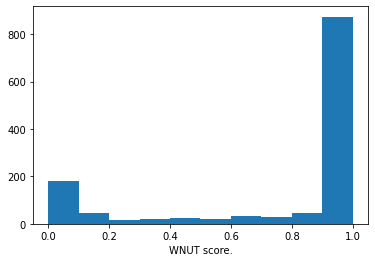

In [ ]:
plt.hist(wnut_test_scores)
plt.xlabel("WNUT score.")
plt.show()

In [ ]:
score_indices = np.argsort(wnut_test_scores)

In [ ]:
wnut_predicted_labels = np.array(predicted_labels["wnut_test"])[np.argsort(wnut_test_scores)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
wnut_true_labels = np.array([list(example["text_labels"]) for example in wnut["test"]])[np.argsort(wnut_test_scores)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
predicted_splits = np.array_split(wnut_predicted_labels, 5, )
true_splits = np.array_split(wnut_true_labels, 5)
score_splits = np.array_split(wnut_test_scores[np.argsort(wnut_test_scores)], 5)

In [ ]:
print("score\tf1")
for scores, true_split, predicted_split in zip(score_splits, true_splits, predicted_splits):
    mean_score = np.mean(scores)
    f1 = seqeval.metrics.f1_score(true_split, predicted_split)
    print(f"{mean_score:.3f}\t{f1:.3f}")

score	f1
0.078	0.521
0.785	0.431
0.997	0.354
1.000	0.230
1.000	0.157
